In [30]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from keras.layers import Dense
from keras.models import Sequential
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
# pretty print only the last output of the cell
InteractiveShell.ast_node_interactivity = "last_expr"
# http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt
data = pd.read_csv('data\data.csv')



In [31]:
print("Preprocessing Data")
col_names = data.columns.tolist()
print("Column Names:")
print(col_names)



Preprocessing Data
Column Names:
['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']


In [32]:
print('\n Sample Data')
data[col_names].head(6)




 Sample Data


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"


In [33]:
print(data.shape)
print(data.dtypes)

(1309, 14)
pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object


In [34]:
for i in data.columns.tolist():
    k = sum(pd.isnull(data[i]))
    print(i, k)


pclass 0
survived 0
name 0
sex 0
age 0
sibsp 0
parch 0
ticket 0
fare 0
cabin 0
embarked 0
boat 0
body 0
home.dest 0


In [35]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [36]:
for i in data.columns.tolist():
    k = sum(pd.isnull(data[i]))
    print(i, k)

pclass 0
survived 0
name 0
sex 0
age 263
sibsp 0
parch 0
ticket 0
fare 1
cabin 1014
embarked 2
boat 823
body 1188
home.dest 564


In [37]:
print(data.describe(include=['int64', 'float64']))
print(data.describe(include=['object']))

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200
                    name   sex    ticket        cabin embarked boat body  \
count               1309  1309      1309          295     1307  486  121   
unique

In [38]:
print(data['survived'].value_counts())

0    809
1    500
Name: survived, dtype: int64


In [39]:
print(data.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object


<AxesSubplot:xlabel='survived', ylabel='fare'>

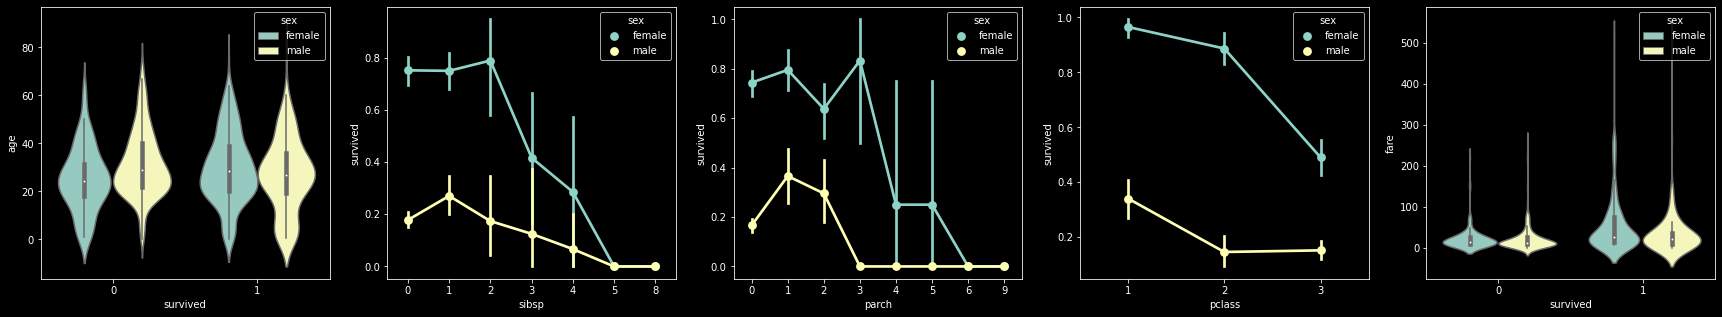

In [40]:

fig, axs = plt.subplots(ncols=5, figsize=(30, 5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [41]:
data.replace({'male': 1, 'female': '0'}, inplace=True)

In [42]:
data[col_names].head(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",1,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"


In [43]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [44]:
data['relatives'] = data.apply(lambda row: int(
    (row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [45]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [46]:
print("Modeling Data")
x_train, x_test, y_train, y_test = train_test_split(
    data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

Modeling Data


In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [48]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [49]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [50]:

model = Sequential()

In [51]:
model.add(Dense(5, kernel_initializer='uniform',
                activation='relu', input_dim=5))
model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5718
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5993
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.7069
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.7584
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.7727
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7691
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.7667
Epoch 10/50
27/27 [==============================] - 0s 923us/step - loss: 0.6118 - accuracy: 0.7679
Epoch 11/50
27/27

In [54]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7894736842105263
